<a href="https://colab.research.google.com/github/guptasim8/Thesis-Related/blob/main/Mitigating_Skewdness_of_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing on data**

Handling imbalanced data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

About DataSet:
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model. We will then handle imbalance in data using various techniques and improve f1-score

In [ ]:
df = pd.read_csv("drive/MyDrive/DataSets/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1419,3498-LZGQZ,Male,0,Yes,Yes,63,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.15,1177.05,No
3831,6946-LMSQS,Male,1,Yes,No,25,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,One year,Yes,Electronic check,89.05,2177.45,Yes
2186,5970-GHJAW,Male,0,Yes,Yes,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,862.4,No
3763,2959-MJHIC,Male,0,Yes,No,4,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.35,307.4,Yes
6590,1031-IIDEO,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.85,70.85,Yes


In [ ]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#deleting customer id
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
#TotalCharges should be float but it is an object
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
#delete null entries
df2=df[df.TotalCharges!=' ']
df2.shape

(7032, 20)

In [ ]:
df2.TotalCharges = pd.to_numeric(df2.TotalCharges)
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

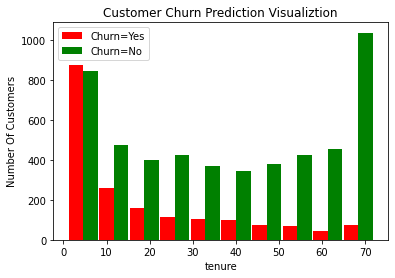

In [ ]:
tenure_churn_no = df2[df2.Churn=='No'].tenure
tenure_churn_yes = df2[df2.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()


Observe that new custormers are mostly moving

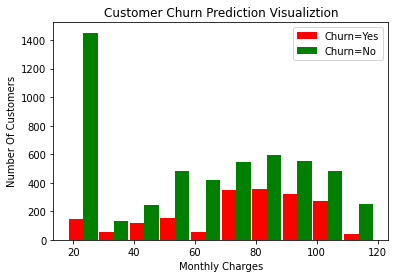

In [ ]:
mc_churn_no = df2[df2.Churn=='No'].MonthlyCharges      
mc_churn_yes = df2[df2.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(df2)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
#Some of the columns have no internet service or no phone service, that can be replaced with a simple No
df2.replace('No internet service','No',inplace=True)
df2.replace('No phone service','No',inplace=True)
print_unique_col_values(df2)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
#Convert Yes and No to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df2[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
df2['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


One Hot Encoding for categorical columns

In [ ]:
df3 = pd.get_dummies(data=df2, columns=['InternetService','Contract','PaymentMethod'])
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
for col in df3:
    print(f'{col}: {df3[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [ ]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
#Convert all the data to same scale [0,1]
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [ ]:
for col in df3:
    print(f'{col}: {df3[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# **Train Test Split**

In [ ]:
X = df3.drop('Churn',axis='columns')
y = testLabels = df3.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [ ]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [ ]:
5163/1869

2.7624398073836276

In [ ]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1


# **Build a model (ANN) in tensorflow/keras**

In [ ]:
!pip install tensorflow-addons
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.5 MB/s 


In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=10)
    else:
        model.fit(X_train, y_train, epochs=10, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
176/176 [==============================] - 3s 5ms/step - loss: 0.4844 - accuracy: 0.7589
Epoch 2/10
176/176 [==============================] - 1s 4ms/step - loss: 0.4277 - accuracy: 0.7924
Epoch 3/10
176/176 [==============================] - 1s 6ms/step - loss: 0.4197 - accuracy: 0.7979
Epoch 4/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4155 - accuracy: 0.7991
Epoch 5/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8053
Epoch 6/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8014
Epoch 7/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4097 - accuracy: 0.8025
Epoch 8/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4076 - accuracy: 0.8059
Epoch 9/10
176/176 [==============================] - 1s 5ms/step - loss: 0.4064 - accuracy: 0.8057
Epoch 10/10
44/44 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.8031
[

# **Mitigating Skewdness of Data**

# Method 1: Undersampling

In [ ]:
# Class count
count_class_0, count_class_1 = df2.Churn.value_counts()

# Divide by class
df_class_0 = df3[df3['Churn'] == 0]
df_class_1 = df3[df3['Churn'] == 1]

In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 0.6013 - accuracy: 0.7043
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7545
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7669
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7709
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7676
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7692
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7679
Epoch 8/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7699
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7642
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7420
[0.5015833377838135

Check classification report above. f1-score for minority class 1 went down from 0.80 to 0.75. Score for class 0 reduced to 0.75 from 0.87 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

# Method2: Oversampling

In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [ ]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
259/259 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7358
Epoch 2/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7571
Epoch 3/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7628
Epoch 4/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7638
Epoch 5/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7638
Epoch 6/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7690
Epoch 7/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7718
Epoch 8/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7760
Epoch 9/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7746
Epoch 10/10
65/65 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7735
[

Check classification report above. f1-score for minority class 1 went down from 0.80 to 0.77. Score for class 0 reduced to 0.76 from 0.87 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

# Method3: SMOTE

In [ ]:
#To install imbalanced-learn library use pip install imbalanced-learn command
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = df3.drop('Churn',axis='columns')
y = df3['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
259/259 [==============================] - 3s 4ms/step - loss: 0.5155 - accuracy: 0.7544
Epoch 2/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4728 - accuracy: 0.7758
Epoch 3/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4634 - accuracy: 0.7789
Epoch 4/10
259/259 [==============================] - 1s 2ms/step - loss: 0.4592 - accuracy: 0.7781
Epoch 5/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4546 - accuracy: 0.7838
Epoch 6/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4508 - accuracy: 0.7860
Epoch 7/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.7878
Epoch 8/10
259/259 [==============================] - 1s 3ms/step - loss: 0.4435 - accuracy: 0.7916
Epoch 9/10
259/259 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.7915
Epoch 10/10
65/65 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.7730
[

# Method4: Use of Ensemble with undersampling

In [ ]:
df3.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
# Regain Original features and labels
X = df3.drop('Churn',axis='columns')
y = df3['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
df4 = X_train.copy()
df4['Churn'] = y_train
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df3_class0 = df4[df4.Churn==0]
df3_class1 = df4[df4.Churn==1]

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 0.5864 - accuracy: 0.7090
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7569
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7619
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7679
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7716
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7669
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7696
Epoch 8/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7702
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7736
Epoch 10/10
44/44 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7598
[0.4865061044692993

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 0.5974 - accuracy: 0.7020
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7525
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7542
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7662
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7645
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7696
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7682
Epoch 8/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7639
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7666
Epoch 10/10
44/44 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7463
[0.4909724891185760

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
83/83 [==============================] - 1s 2ms/step - loss: 0.5443 - accuracy: 0.7381
Epoch 2/10
83/83 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7609
Epoch 3/10
83/83 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7700
Epoch 4/10
83/83 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7727
Epoch 5/10
83/83 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7734
Epoch 6/10
83/83 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7780
Epoch 7/10
83/83 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7772
Epoch 8/10
83/83 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7791
Epoch 9/10
83/83 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7818
Epoch 10/10
44/44 [==============================] - 0s 2ms/step - loss: 0.5992 - accuracy: 0.6645
[0.5991628170013428

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

